# Brining In Packages to Import

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

from subprocess import check_output


# Reading the Data


In [2]:
df = pd.read_csv("./Speed Dating Data.csv", encoding="ISO-8859-1")
input_vars = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

# Female Model Prediction

In [3]:
# female model
f = df.loc[df.gender == 0, :]
f_data = f.copy()
f_data = f.dropna(subset=input_vars)
f_model = sm.OLS(f_data.dec, sm.add_constant(f_data.loc[:, input_vars]))
f_results = f_model.fit()
f_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sat, 17 Dec 2016   Prob (F-statistic):          2.87e-241
Time:                        08:42:39   Log-Likelihood:                -1785.9
No. Observations:                3409   AIC:                             3590.
Df Residuals:                    3400   BIC:                             3645.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3958      0.036    -11.121      0.000        -0.466    -0.326
attr           0.0496      0.005     10.220      0.000         0.040     0.059
sinc          -0.0248      0.005     -4.583      0.000        -0.035    -0.014
intel          0.0101      0.007      1.472      0.141        -0.003     0.024
fun            0.0204      0.005      3.783      0.000         0.010     0.031
amb           -0.0208      0.005     -4.020      0.000        -0.031    -0.011
shar           0.0236      0.005      5.041      0.000         0.014     0.033
like           0.0615      0.006      9.469      0.000         0.049     0.074
prob           0.0182      0.004      4.849      0.000         0.011     0.026
==============================================================================
Omnibus:                     1316.065   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.731
Skew:                           0.225   Prob(JB):                     1.16e-43
Kurtosis:                       1.909   Cond. No.                         93.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now let's rank the features based on their importance in the model using RFE method, for women.



In [4]:
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(f_data.loc[:, input_vars], f_data.dec)
ranking_f=cfl.ranking_
feature_ranking_f=zip(ranking_f, input_vars)
list(feature_ranking_f)

[(2, 'attr'),
 (6, 'sinc'),
 (8, 'intel'),
 (3, 'fun'),
 (4, 'amb'),
 (5, 'shar'),
 (1, 'like'),
 (7, 'prob')]

# Now let's rank the features based on their importance in the model using RFE method, for men.

In [5]:
# male model
m = df.loc[df.gender == 1, :]
m_data = m.copy()
m_data = m.dropna(subset=input_vars)
m_model = sm.OLS(m_data.dec, sm.add_constant(m_data.loc[:, input_vars]))
m_results = m_model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 17 Dec 2016   Prob (F-statistic):               0.00
Time:                        08:42:43   Log-Likelihood:                -1762.4
No. Observations:                3554   AIC:                             3543.
Df Residuals:                    3545   BIC:                             3598.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4309      0.037    -11.712      0.000        -0.503    -0.359
attr           0.0812      0.005     16.155      0.000         0.071     0.091
sinc          -0.0380      0.006     -6.559      0.000        -0.049    -0.027
intel         -0.0100      0.007     -1.463      0.144        -0.023     0.003
fun            0.0180      0.005      3.284      0.001         0.007     0.029
amb           -0.0215      0.005     -4.117      0.000        -0.032    -0.011
shar           0.0111      0.005      2.442      0.015         0.002     0.020
like           0.0916      0.007     13.992      0.000         0.079     0.104
prob           0.0253      0.004      6.559      0.000         0.018     0.033
==============================================================================
Omnibus:                      387.341   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.228
Skew:                          -0.153   Prob(JB):                     7.81e-27
Kurtosis:                       2.153   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now let's rank the features based on their importance in the model using RFE method, for men.

In [6]:
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(m_data.loc[:, input_vars], m_data.dec)
ranking_m=cfl.ranking_
feature_ranking_m=zip(ranking_m, input_vars)
list(feature_ranking_m)
# you can see that being funny is more important for women than man in selecting a partner!  
# Being sincere on the other hand is more important to men than women. 

[(2, 'attr'),
 (3, 'sinc'),
 (8, 'intel'),
 (5, 'fun'),
 (6, 'amb'),
 (7, 'shar'),
 (1, 'like'),
 (4, 'prob')]

# Like vs. Attractiveness

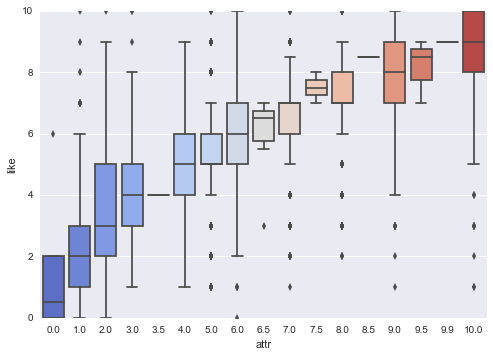

In [10]:
sns.boxplot(data=df,x='attr',y='like',palette='coolwarm')

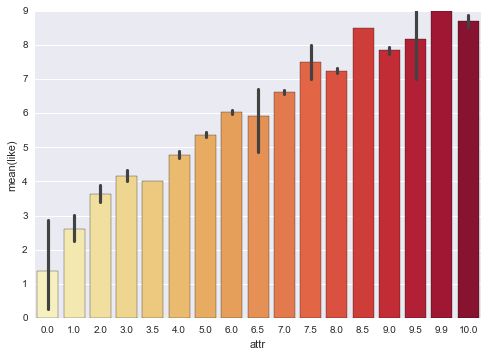

In [11]:
sns.barplot(data=df,x='attr',y='like', palette='YlOrRd')

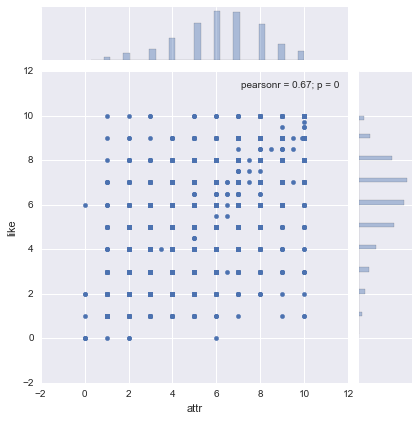

In [13]:
sns.jointplot(data=df,x='attr',y='like')

# Attractiveness vs. Intelligence

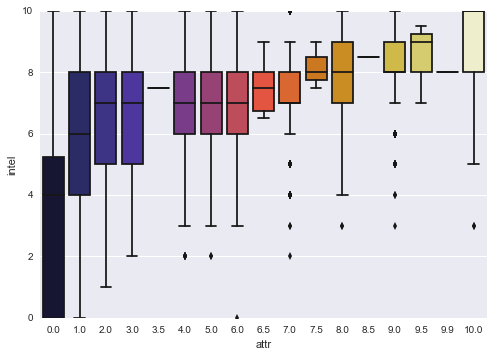

In [27]:
sns.boxplot(data=df,x='attr',y='intel',palette='CMRmap')

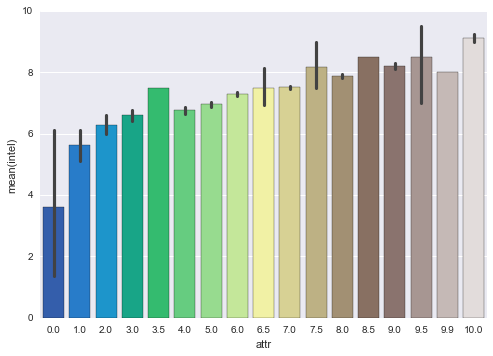

In [28]:
sns.barplot(data=df,x='attr',y='intel',palette='terrain')

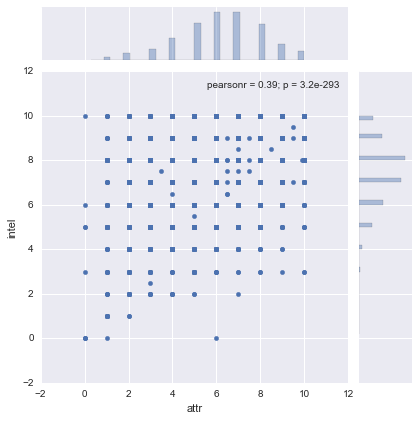

In [12]:
sns.jointplot(data=df,x='attr',y='intel')

# Ambition vs. Share

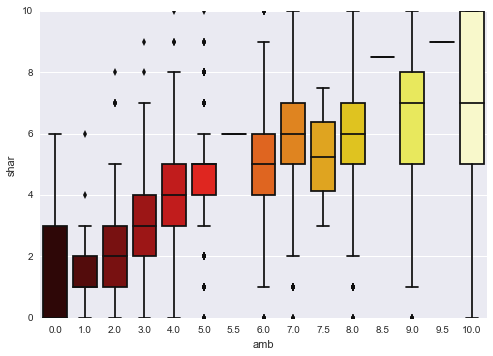

In [29]:
sns.boxplot(data=df,x='amb',y='shar',palette='hot')

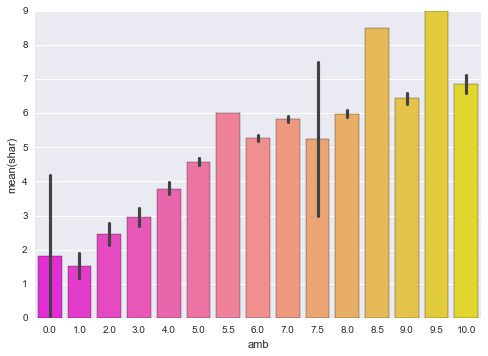

In [30]:
sns.barplot(data=df,x='amb',y='shar',palette='spring')

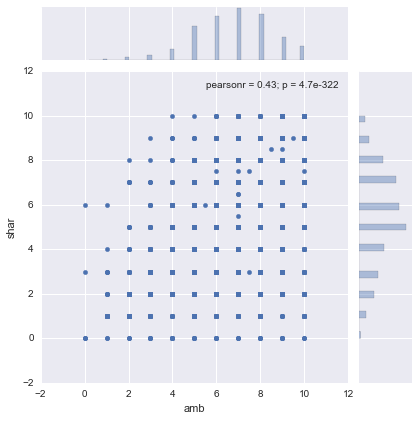

In [14]:
sns.jointplot(data=df,x='amb',y='shar')

# Fun Vs. Intelligence

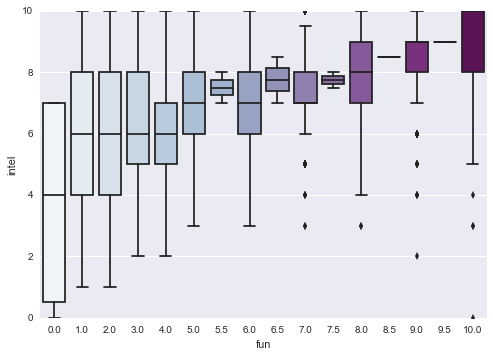

In [31]:
sns.boxplot(data=df,x='fun',y='intel',palette='BuPu')

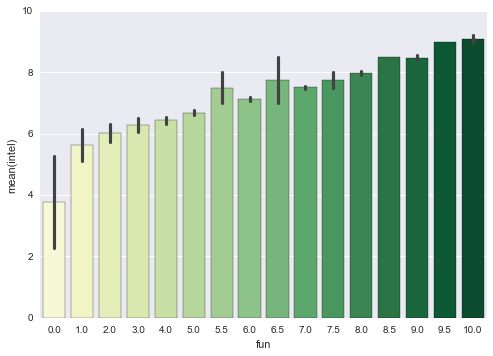

In [32]:
sns.barplot(data=df,x='fun',y='intel',palette='YlGn')

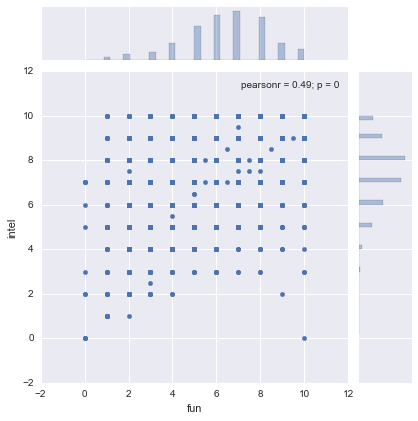

In [20]:
sns.jointplot(data=df,x='fun',y='intel')

# Share and Atrractiveness

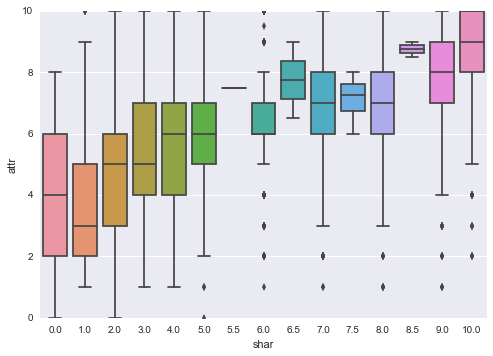

In [22]:
sns.boxplot(data=df,x='shar',y='attr')

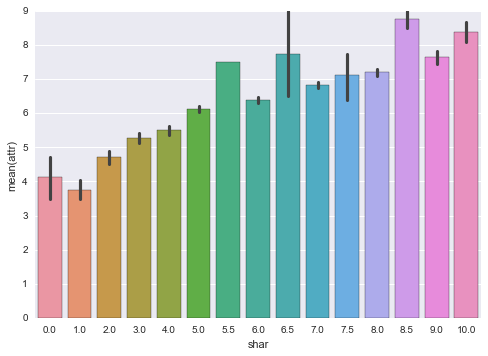

In [25]:
sns.barplot(data=df,x='shar',y='attr')

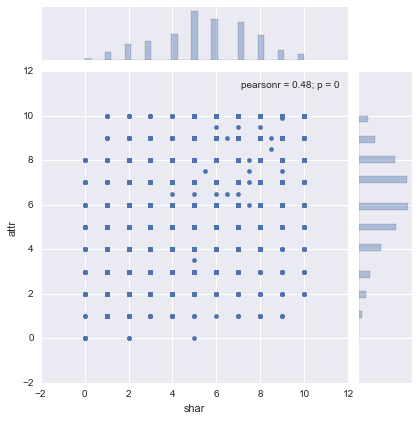

In [26]:
sns.jointplot(data=df,x='shar',y='attr')

# Regression Between Intelligence and Attractiveness

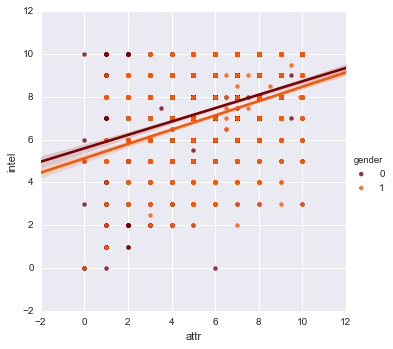

In [16]:
sns.lmplot(x='attr',y='intel',data=df,hue='gender',palette='gist_heat')

# Regression Between Ambition and Like

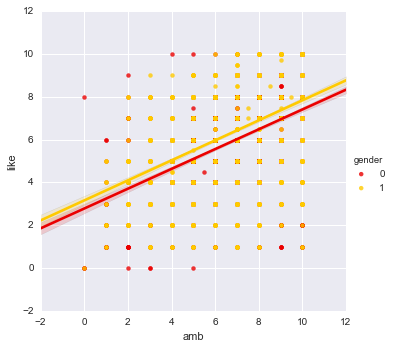

In [17]:
sns.lmplot(x='amb',y='like',data=df,hue='gender',palette='hot')

# Regression Between Fun and Sincere

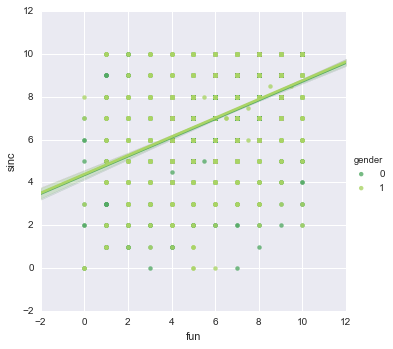

In [18]:
sns.lmplot(data=df,x='fun',y='sinc',hue='gender',palette='summer')

In the regression models, it turns out that there is a strong correlation with the attraction and like between the male and female genders. Attraction has become one of the strongest factors in terms of considering a date between a male and a female based on the information that is given in the barplots and boxplots. 